In [23]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import CountVectorizer  

In [38]:
df = pd.read_csv(r'C:\Users\MTR\OneDrive\Desktop\AxionRay\Task2.csv')  
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01/02/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01/03/2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01/04/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01/04/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01/05/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,02/07/2024,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,02/07/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,02/07/2024,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,02/07/2024,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [43]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01/02/2024,wheel asm-strg *jet black,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01/03/2024,module asm-strg whl ht cont,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01/04/2024,wheel asm-strg *backen blackk,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,R2210881CNJX0287,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01/04/2024,wheel asm-strg *jet black,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01/05/2024,wheel asm-strg *jet black,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,02/07/2024,wheel asm-strg *black,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,02/07/2024,wheel asm-strg *backen blackk,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,22222280KKBP0890,2822282187,6,1,N,6MB26,Sport,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,02/07/2024,wheel asm-strg *black,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,02/07/2024,wheel asm-strg *black,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [40]:
def column_analysis(df):  
    analysis_results = []  
    for col in df.columns:  
        analysis_results.append({  
            "Column Name": col,  
            "Data Type": df[col].dtype,  
            "Unique Values": df[col].nunique(),    
            "Significance": f"Important for understanding {col} related to vehicle service."  
        })  
    return pd.DataFrame(analysis_results)  

column_analysis_df = column_analysis(df)  
print(column_analysis_df)

                      Column Name Data Type  Unique Values  \
0                             VIN    object             98   
1                  TRANSACTION_ID     int64             32   
2             CORRECTION_VERBATIM    object             93   
3               CUSTOMER_VERBATIM    object            100   
4                     REPAIR_DATE    object             29   
5                  CAUSAL_PART_NM    object             18   
6   GLOBAL_LABOR_CODE_DESCRIPTION    object              4   
7                        PLATFORM    object             11   
8                      BODY_STYLE    object              6   
9                            VPPC    object             26   
10                          PLANT    object             11   
11                  BUILD_COUNTRY    object              3   
12            LAST_KNOWN_DLR_NAME    object            100   
13            LAST_KNOWN_DLR_CITY    object             94   
14          REPAIRING_DEALER_CODE    object             95   
15      

## Data Cleaning

In [42]:
df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration  
# Alternatively, you can drop columns or rows: df.dropna(inplace=True)  

# Addressing inconsistencies in categorical columns  
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].str.lower().str.strip()  


C:\Users\MTR\AppData\Local\Temp\ipykernel_13920\1844297826.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for demonstration


In [44]:
# Convert numerical columns to the correct format and remove outliers  
num_cols = ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST']  
for col in num_cols:  
    df[col] = pd.to_numeric(df[col], errors='coerce') # ensure they are numeric  
    # Remove outliers using IQR method  
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]  


C:\Users\MTR\AppData\Local\Temp\ipykernel_13920\539178009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce') # ensure they are numeric


## Identifying Critical Columns 

In [28]:
# Selecting top 5 critical columns based on their importance  
critical_columns = ['VIN', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'GLOBAL_LABOR_CODE_DESCRIPTION']  
critical_column_analysis = df[critical_columns].copy()  

# Reasoning for selection  
print("Top 5 Critical Columns and Reasoning:")  
for col in critical_columns:  
    print(f"{col}: Important for tracking repairs and customer feedback.")  

Top 5 Critical Columns and Reasoning:
VIN: Important for tracking repairs and customer feedback.
CORRECTION_VERBATIM: Important for tracking repairs and customer feedback.
CUSTOMER_VERBATIM: Important for tracking repairs and customer feedback.
REPAIR_DATE: Important for tracking repairs and customer feedback.
GLOBAL_LABOR_CODE_DESCRIPTION: Important for tracking repairs and customer feedback.


# Visualizations 

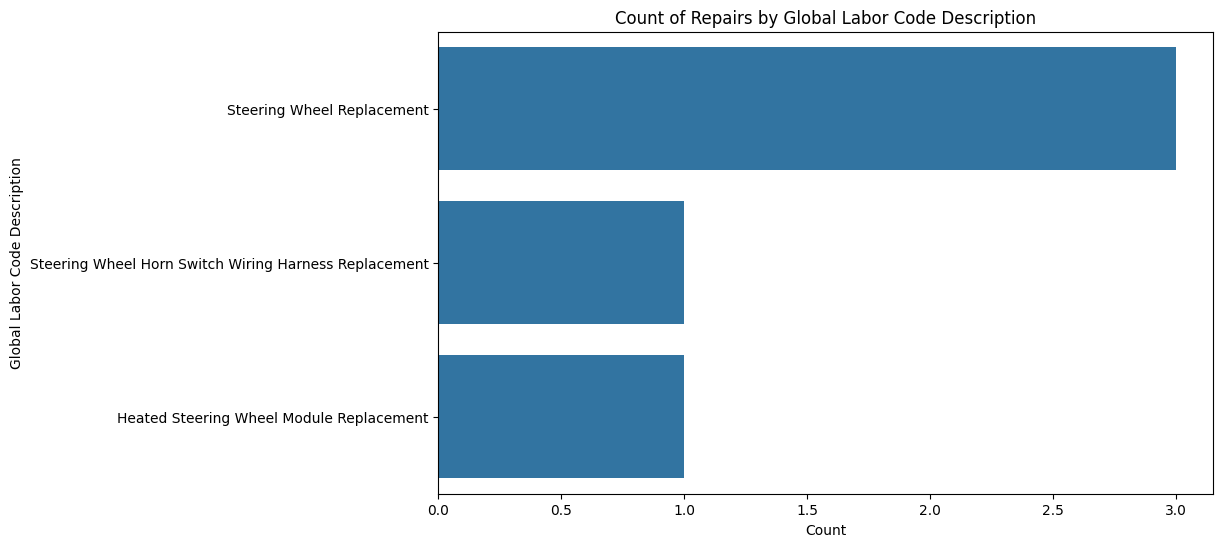

In [29]:
 # 1. Count of Repairs by Global Labor Code Description  
plt.figure(figsize=(10, 6))  
sns.countplot(y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, order=df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().index)  
plt.title('Count of Repairs by Global Labor Code Description')  
plt.xlabel('Count')  
plt.ylabel('Global Labor Code Description')  
plt.show() 

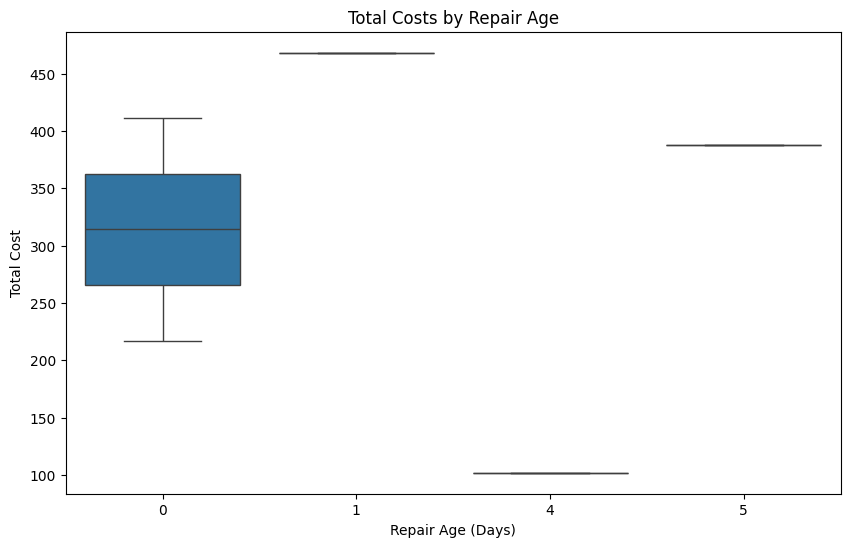

In [30]:
# 2. Total Costs by Repair Age  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='REPAIR_AGE', y='TOTALCOST', data=df)  
plt.title('Total Costs by Repair Age')  
plt.xlabel('Repair Age (Days)')  
plt.ylabel('Total Cost')  
plt.show()

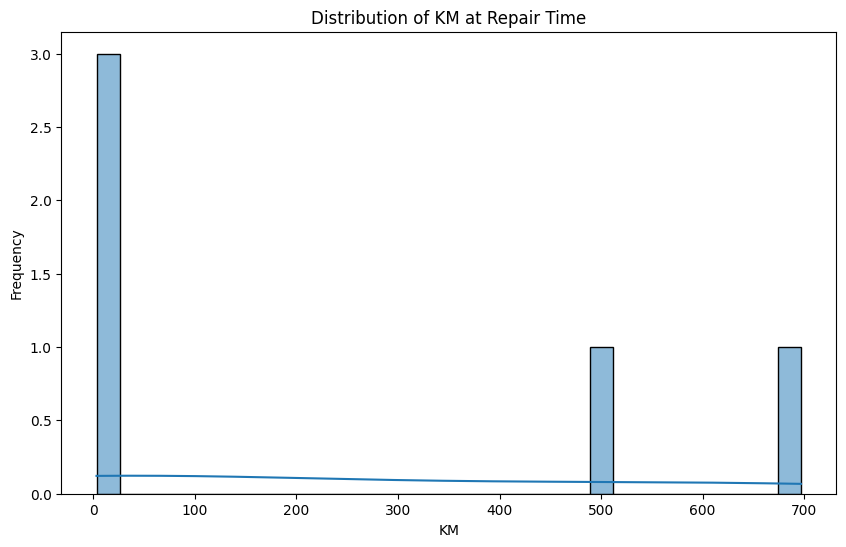

In [31]:
# 3. KM Distribution  
plt.figure(figsize=(10, 6))  
sns.histplot(df['KM'], bins=30, kde=True)  
plt.title('Distribution of KM at Repair Time')  
plt.xlabel('KM')  
plt.ylabel('Frequency')  
plt.show() 

In [32]:
# Task 4: Generating Tags from Free Text  
def generate_tags(df):  
    descriptions = df['CORRECTION_VERBATIM'].fillna('')  
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  
    X = vectorizer.fit_transform(descriptions)  
    tags = vectorizer.get_feature_names_out()  

    # Convert counts to DataFrame  
    tags_df = pd.DataFrame(X.toarray(), columns=tags)  
    return tags_df.sum().sort_values(ascending=False)  

tags_generated = generate_tags(df)  
print("Generated Tags:")  
print(tags_generated.head(10))

Generated Tags:
steering              6
wheel                 6
steering wheel        6
removed               5
operating designed    2
operating             2
removed replaced      2
heated steering       2
heated                2
designed              2
dtype: int64


In [33]:
# Task 5: Summary and Insights  
summary_text = """  
From the analysis, we can summarize the common corrective actions related to steering wheel issues.  
The top tags associated with repairs include 'steering wheel', 'replacement', and 'module'.  
This indicates a significant focus on these components, suggesting potential improvements.  
Stakeholders should consider investigating the frequency of these parts and ways to improve their manufacturing or design.  

Actionable recommendations include:  
1. Investigate the steering wheel quality and consider redesigns if issues are prevalent.  
2. Pay attention to customer reports, particularly around heated elements.  
3. Monitor the repair trends over time to identify any seasonal or mileage-related issues that may arise.  
"""  

print(summary_text)  


  
From the analysis, we can summarize the common corrective actions related to steering wheel issues.  
The top tags associated with repairs include 'steering wheel', 'replacement', and 'module'.  
This indicates a significant focus on these components, suggesting potential improvements.  
Stakeholders should consider investigating the frequency of these parts and ways to improve their manufacturing or design.  

Actionable recommendations include:  
1. Investigate the steering wheel quality and consider redesigns if issues are prevalent.  
2. Pay attention to customer reports, particularly around heated elements.  
3. Monitor the repair trends over time to identify any seasonal or mileage-related issues that may arise.  



In [35]:
# Discrepancies Found  
print("Discrepancies in the dataset:")  
print("Number of missing values in each column:")  
print(df.isnull().sum())  

Discrepancies in the dataset:
Number of missing values in each column:
VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD 

In [36]:
# Saving cleaned data to CSV  
df.to_csv('cleaned_data.csv', index=False)  


In [22]:
from matplotlib.backends.backend_pdf import PdfPages  

# Summary of the analysis and visualizations  
import matplotlib.backends.backend_pdf  

with PdfPages('analysis_report.pdf') as pdf:   # type: ignore
    # Example of adding figures to the PDF  
    plt.figure()  
    sns.countplot(y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, order=df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().index)  
    plt.title('Count of Repairs by Global Labor Code Description')  
    plt.xlabel('Count')  
    plt.ylabel('Global Labor Code Description')  
    pdf.savefig()  
    plt.close()  

    # Add further visualizations similarly  

print("Analysis completed and report generated!")  

Analysis completed and report generated!
